<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\melunfiltered\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [3]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)
    num_class_2 = np.sum(labels == 2)

    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1, num_class_2)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)
    class_2_indices = np.random.choice(np.where(labels == 2)[0], samples_per_class, replace=False)

    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices, class_2_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [4]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=3):
    """
    Plots and computes metrics for classification tasks.

    Args:
        labels (array-like): True labels.
        predictions (array-like): Predicted probabilities or class predictions.
        n_classes (int): Number of classes (default is 3 for multi-class classification).
    """
    # If predictions are probabilities, convert to class predictions
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        ratio_correct = correct_preds / total_true_samples if total_true_samples != 0 else 0
        print(f'Class {d}: Correct Predictions / Total True Samples = {correct_preds}/{total_true_samples} ({ratio_correct:.2%})')

    # Precision-Recall Curves and AUPRC
    print("\nPrecision-Recall Curves:")
    labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
    auprcs = []
    for class_idx in range(n_classes):
        precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        auprc = auc(recall, precision)
        auprcs.append(auprc)
        plt.plot(recall, precision, label=f'Class {class_idx + 1} (AUPRC = {auprc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # ROC Curves and AUC
    print("\nROC Curves:")
    for class_idx in range(n_classes):
        fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_idx + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Mean F1 Score
    f1 = f1_score(labels, predicted_classes, average='macro')
    print(f"\nMean F1 Score: {f1:.4f}")

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Average AUPRC
    mean_auprc = np.mean(auprcs)
    print(f"Average AUPRC: {mean_auprc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": [cm[d][d] / sum(cm[d]) if sum(cm[d]) != 0 else 0 for d in range(n_classes)],
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
        "average_auprc": mean_auprc,
        "auprc_per_class": auprcs,
    }

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [6]:
import torch
import torch.nn as nn

debug_mode_flag = False
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set random seed for reproducibility
torch.manual_seed(42)
debug_mode_flag = False
import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, x):
        attn_output, _ = self.att(x, x, x)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class TransformerModel(nn.Module):
    def __init__(self, input_shape, num_classes, embed_dim=64, num_heads=2, ff_dim=64, num_transformer_blocks=2,dropout_rate=0.1):
        super(TransformerModel, self).__init__()
        self.reshape = nn.Flatten(start_dim=2)  # Reshaping as in TensorFlow's Reshape
        self.embedding = nn.Linear(input_shape[1] * input_shape[2], embed_dim)
        self.transformer_blocks = nn.ModuleList(
            [TransformerBlock(embed_dim, num_heads, ff_dim,dropout_rate=dropout_rate) for _ in range(num_transformer_blocks)]
        )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.reshape(x)
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # PyTorch uses (seq_len, batch, embed_dim) format for transformers
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)
        x = x.permute(1, 2, 0)  # Back to (batch, embed_dim, seq_len)
        x = self.global_avg_pool(x).squeeze(-1)
        x = self.dropout(x)
        return self.classifier(x)


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [7]:
model  = TransformerModel(input_shape=(224,224,3),num_classes=3) # declare model here
randomdata = torch.randn((1,224,224,3))
output = model(randomdata)
output.shape

torch.Size([1, 3])

In [8]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
TransformerModel                                             --
├─Flatten: 1-1                                               --
├─Linear: 1-2                                                43,072
├─ModuleList: 1-3                                            --
│    └─TransformerBlock: 2-1                                 --
│    │    └─MultiheadAttention: 3-1                          16,640
│    │    └─Sequential: 3-2                                  8,320
│    │    └─LayerNorm: 3-3                                   128
│    │    └─LayerNorm: 3-4                                   128
│    │    └─Dropout: 3-5                                     --
│    │    └─Dropout: 3-6                                     --
│    └─TransformerBlock: 2-2                                 --
│    │    └─MultiheadAttention: 3-7                          16,640
│    │    └─Sequential: 3-8                                  8,320
│    │    └─Lay

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>

Fold No: 1
Epoch [1/100], Loss: 1.3242, Accuracy: 0.3059
Validation Loss: 1.0341, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1038, Accuracy: 0.3658
Validation Loss: 1.0601, Validation Accuracy: 0.3259
Epoch [3/100], Loss: 1.1106, Accuracy: 0.3541
Validation Loss: 1.0681, Validation Accuracy: 0.3020
Epoch [4/100], Loss: 1.1043, Accuracy: 0.3882
Validation Loss: 1.1723, Validation Accuracy: 0.3113
Epoch [5/100], Loss: 1.1026, Accuracy: 0.3874
Validation Loss: 1.0555, Validation Accuracy: 0.3429
Epoch [6/100], Loss: 1.0929, Accuracy: 0.4156
Validation Loss: 1.0311, Validation Accuracy: 0.3503
Epoch [7/100], Loss: 1.0835, Accuracy: 0.4181
Validation Loss: 1.0594, Validation Accuracy: 0.3736
Epoch [8/100], Loss: 1.0831, Accuracy: 0.4298
Validation Loss: 1.0168, Validation Accuracy: 0.3835
Epoch [9/100], Loss: 1.0677, Accuracy: 0.4555
Validation Loss: 1.0276, Validation Accuracy: 0.4143
Epoch [10/100], Loss: 1.0485, Accuracy: 0.4988
Validation Loss: 1.0068, Validation Accuracy: 0.446

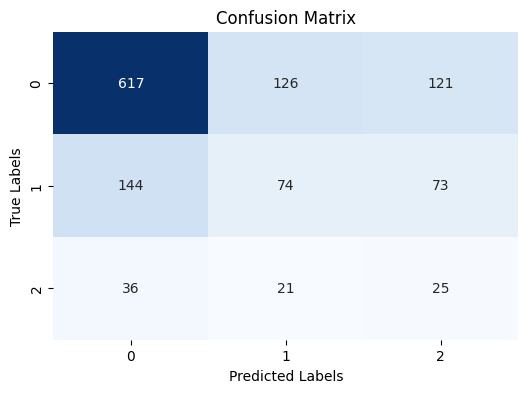


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 617/864 (71.41%)
Class 1: Correct Predictions / Total True Samples = 74/291 (25.43%)
Class 2: Correct Predictions / Total True Samples = 25/82 (30.49%)

Precision-Recall Curves:


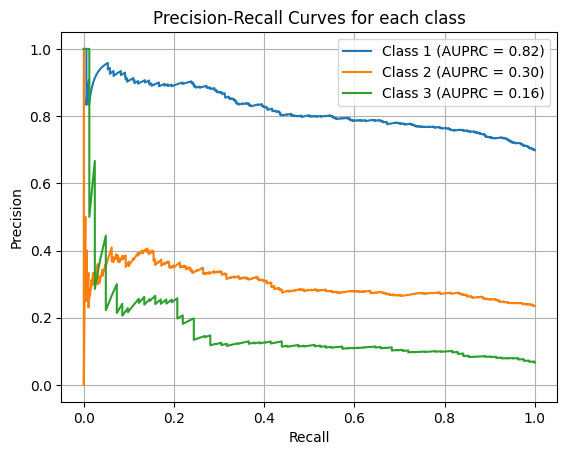


ROC Curves:


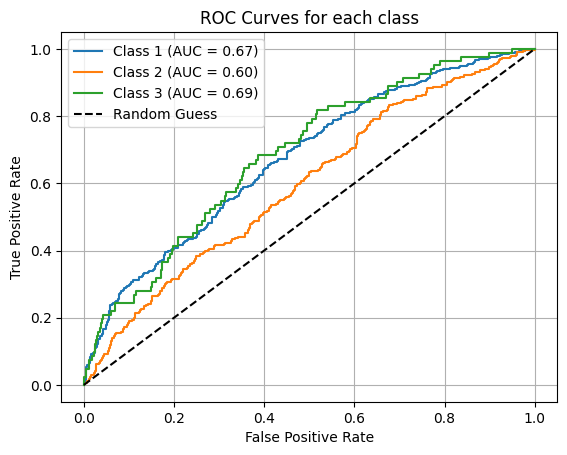


Mean F1 Score: 0.3994
Balanced Accuracy: 0.4244
Average AUPRC: 0.4250

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       864
           1       0.33      0.25      0.29       291
           2       0.11      0.30      0.17        82

    accuracy                           0.58      1237
   macro avg       0.41      0.42      0.40      1237
weighted avg       0.63      0.58      0.60      1237

Fold No: 2
Epoch [1/100], Loss: 1.2659, Accuracy: 0.3490
Validation Loss: 1.0527, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1056, Accuracy: 0.3617
Validation Loss: 1.1689, Validation Accuracy: 0.3917
Epoch [3/100], Loss: 1.0954, Accuracy: 0.3922
Validation Loss: 1.0702, Validation Accuracy: 0.3789
Epoch [4/100], Loss: 1.0926, Accuracy: 0.4027
Validation Loss: 1.0806, Validation Accuracy: 0.3779
Epoch [5/100], Loss: 1.0936, Accuracy: 0.3818
Validation Loss: 1.0777, Validation Accuracy: 0.3964
Epoch [6/100], Los

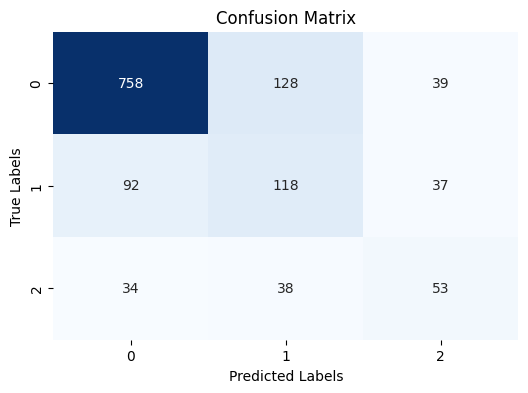


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 758/925 (81.95%)
Class 1: Correct Predictions / Total True Samples = 118/247 (47.77%)
Class 2: Correct Predictions / Total True Samples = 53/125 (42.40%)

Precision-Recall Curves:


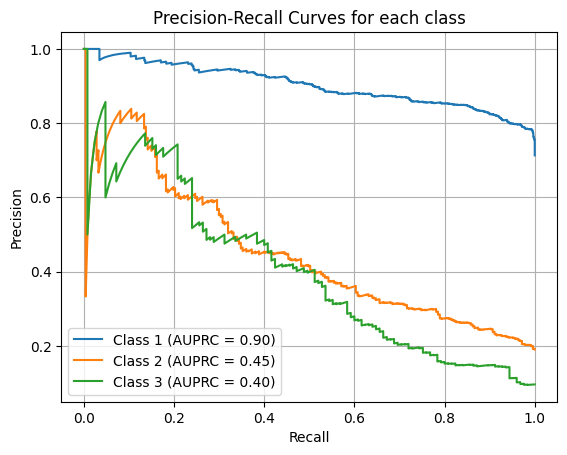


ROC Curves:


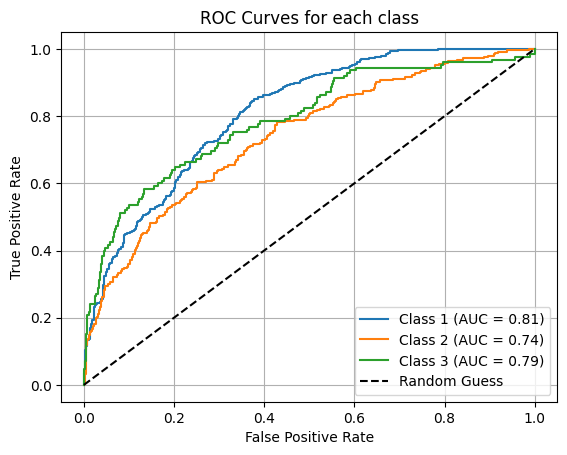


Mean F1 Score: 0.5666
Balanced Accuracy: 0.5737
Average AUPRC: 0.5828

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       925
           1       0.42      0.48      0.44       247
           2       0.41      0.42      0.42       125

    accuracy                           0.72      1297
   macro avg       0.56      0.57      0.57      1297
weighted avg       0.73      0.72      0.72      1297

Fold No: 3
Epoch [1/100], Loss: 1.2811, Accuracy: 0.3287
Validation Loss: 1.1213, Validation Accuracy: 0.3380
Epoch [2/100], Loss: 1.1147, Accuracy: 0.3449
Validation Loss: 1.0527, Validation Accuracy: 0.3333
Epoch [3/100], Loss: 1.1137, Accuracy: 0.3549
Validation Loss: 1.1152, Validation Accuracy: 0.3380
Epoch [4/100], Loss: 1.1112, Accuracy: 0.3303
Validation Loss: 1.1231, Validation Accuracy: 0.4055
Epoch [5/100], Loss: 1.1043, Accuracy: 0.3403
Validation Loss: 1.0494, Validation Accuracy: 0.3467
Epoch [6/100], Los

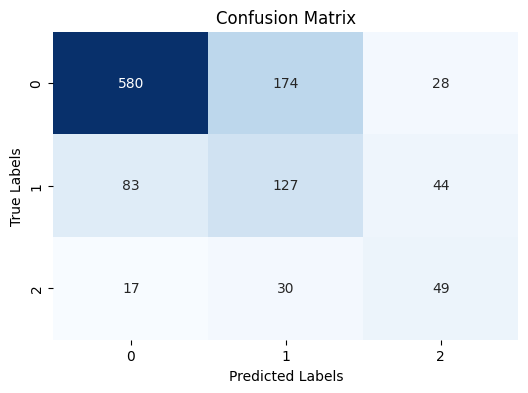


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 580/782 (74.17%)
Class 1: Correct Predictions / Total True Samples = 127/254 (50.00%)
Class 2: Correct Predictions / Total True Samples = 49/96 (51.04%)

Precision-Recall Curves:


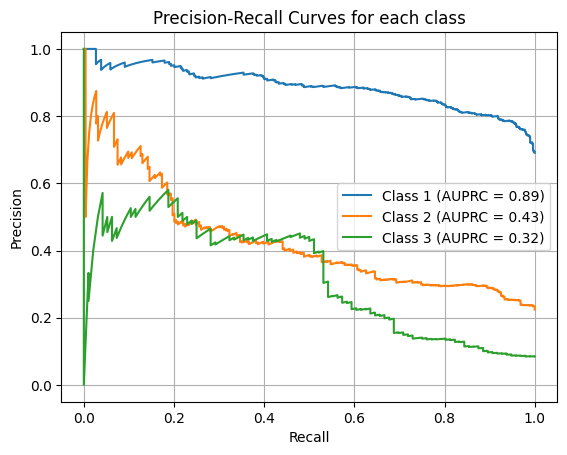


ROC Curves:


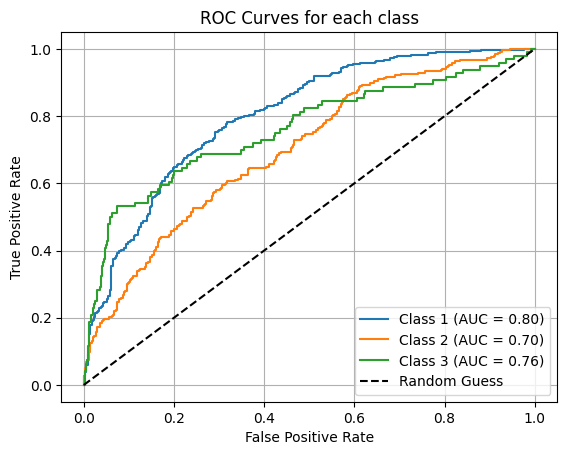


Mean F1 Score: 0.5597
Balanced Accuracy: 0.5840
Average AUPRC: 0.5434

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       782
           1       0.38      0.50      0.43       254
           2       0.40      0.51      0.45        96

    accuracy                           0.67      1132
   macro avg       0.55      0.58      0.56      1132
weighted avg       0.71      0.67      0.68      1132

Fold No: 4
Epoch [1/100], Loss: 1.2327, Accuracy: 0.3386
Validation Loss: 1.0880, Validation Accuracy: 0.3772
Epoch [2/100], Loss: 1.1128, Accuracy: 0.3483
Validation Loss: 1.0571, Validation Accuracy: 0.4365
Epoch [3/100], Loss: 1.1128, Accuracy: 0.3695
Validation Loss: 1.0656, Validation Accuracy: 0.3739
Epoch [4/100], Loss: 1.1091, Accuracy: 0.3422
Validation Loss: 1.1656, Validation Accuracy: 0.3397
Epoch [5/100], Loss: 1.1143, Accuracy: 0.3633
Validation Loss: 1.0513, Validation Accuracy: 0.3474
Epoch [6/100], Los

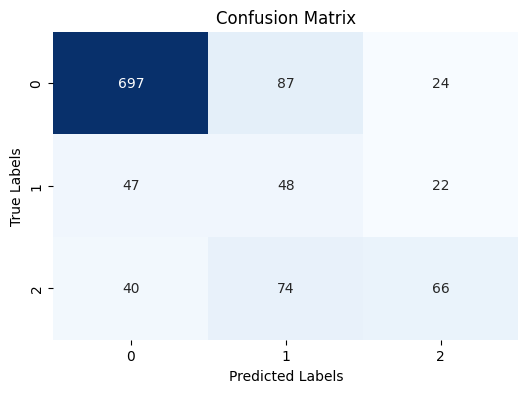


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 697/808 (86.26%)
Class 1: Correct Predictions / Total True Samples = 48/117 (41.03%)
Class 2: Correct Predictions / Total True Samples = 66/180 (36.67%)

Precision-Recall Curves:


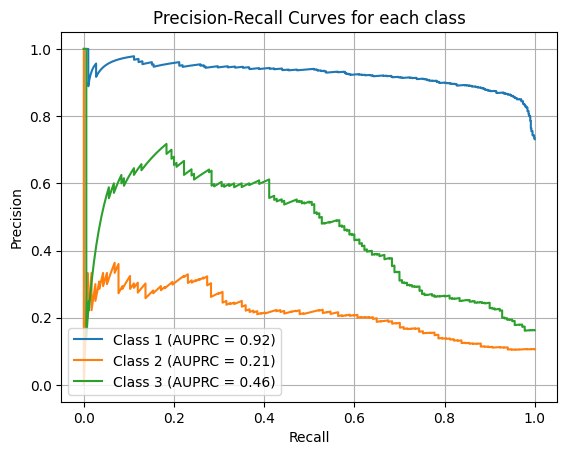


ROC Curves:


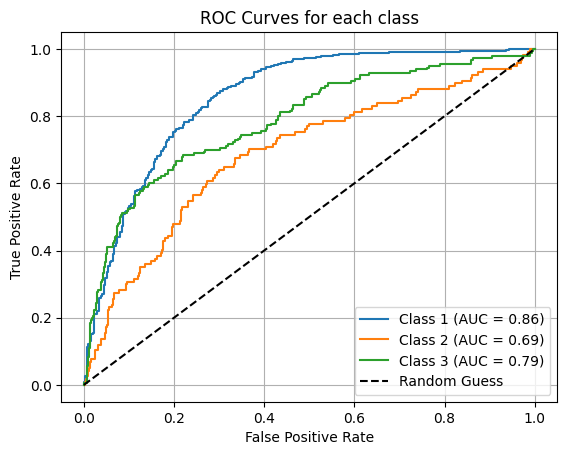


Mean F1 Score: 0.5407
Balanced Accuracy: 0.5465
Average AUPRC: 0.5322

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       808
           1       0.23      0.41      0.29       117
           2       0.59      0.37      0.45       180

    accuracy                           0.73      1105
   macro avg       0.57      0.55      0.54      1105
weighted avg       0.77      0.73      0.75      1105

Fold No: 5
Epoch [1/100], Loss: 1.2064, Accuracy: 0.3399
Validation Loss: 1.0275, Validation Accuracy: 0.3370
Epoch [2/100], Loss: 1.1102, Accuracy: 0.3366
Validation Loss: 1.1375, Validation Accuracy: 0.3911
Epoch [3/100], Loss: 1.1106, Accuracy: 0.3751
Validation Loss: 1.2414, Validation Accuracy: 0.3818
Epoch [4/100], Loss: 1.1015, Accuracy: 0.3630
Validation Loss: 1.1278, Validation Accuracy: 0.3424
Epoch [5/100], Loss: 1.0985, Accuracy: 0.3949
Validation Loss: 1.1496, Validation Accuracy: 0.3874
Epoch [6/100], Los

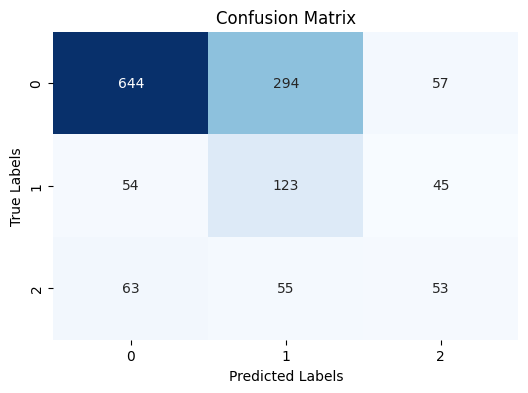


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 644/995 (64.72%)
Class 1: Correct Predictions / Total True Samples = 123/222 (55.41%)
Class 2: Correct Predictions / Total True Samples = 53/171 (30.99%)

Precision-Recall Curves:


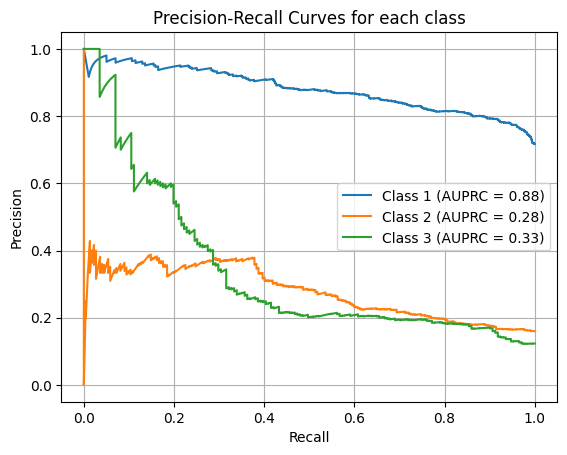


ROC Curves:


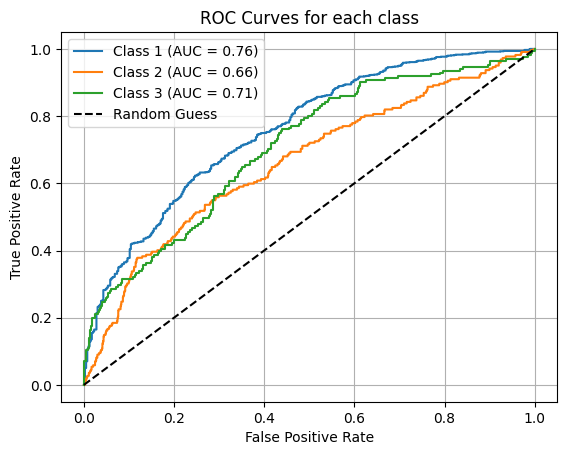


Mean F1 Score: 0.4710
Balanced Accuracy: 0.5037
Average AUPRC: 0.4964

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.65      0.73       995
           1       0.26      0.55      0.35       222
           2       0.34      0.31      0.33       171

    accuracy                           0.59      1388
   macro avg       0.48      0.50      0.47      1388
weighted avg       0.69      0.59      0.62      1388

Accuracy for each fold: [np.float64(0.4244313172656354), np.float64(0.5737307509939088), np.float64(0.5840348820687695), np.float64(0.5465156130997716), np.float64(0.503743918475471)]
AUPRC for each fold: [np.float64(0.42498743529553723), np.float64(0.5827514850403032), np.float64(0.5433600924160317), np.float64(0.5321629392136344), np.float64(0.49636170994907597)]
Average AUPRC across all folds: 0.5159247323829165
Average Balanced Accuracy across all folds: 0.5264912963807112
Results saved to D:\PYTHONIG\newwindow\NOT

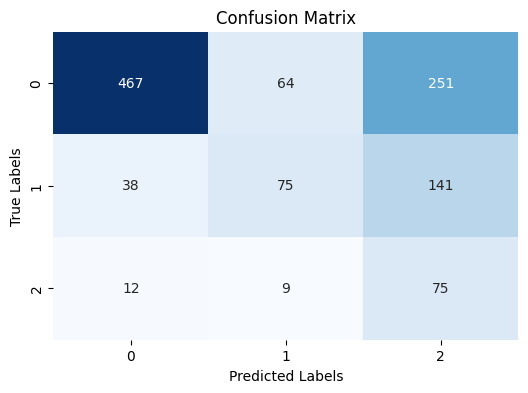


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 467/782 (59.72%)
Class 1: Correct Predictions / Total True Samples = 75/254 (29.53%)
Class 2: Correct Predictions / Total True Samples = 75/96 (78.12%)

Precision-Recall Curves:


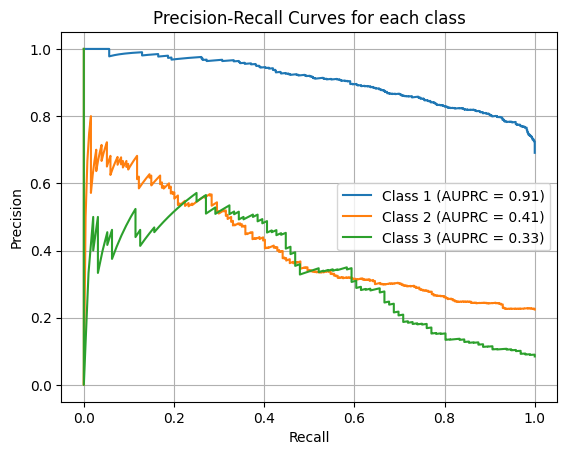


ROC Curves:


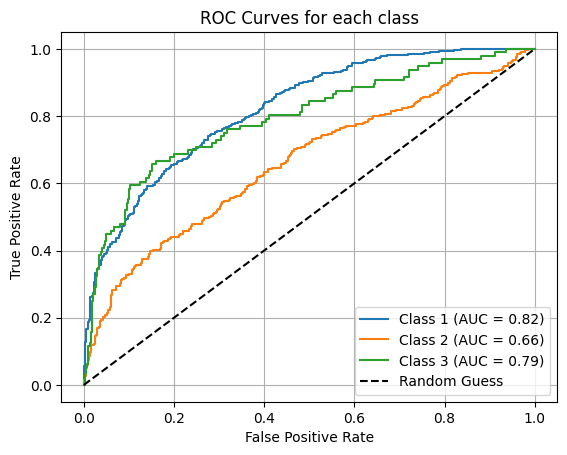


Mean F1 Score: 0.4529
Balanced Accuracy: 0.5579
Average AUPRC: 0.5488

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       782
           1       0.51      0.30      0.37       254
           2       0.16      0.78      0.27        96

    accuracy                           0.55      1132
   macro avg       0.52      0.56      0.45      1132
weighted avg       0.75      0.55      0.60      1132

Fold No: 2
Epoch [1/100], Loss: 1.3476, Accuracy: 0.3519
Validation Loss: 1.1462, Validation Accuracy: 0.4044
Epoch [2/100], Loss: 1.1106, Accuracy: 0.3677
Validation Loss: 1.0875, Validation Accuracy: 0.4235
Epoch [3/100], Loss: 1.0924, Accuracy: 0.4083
Validation Loss: 1.0786, Validation Accuracy: 0.4072
Epoch [4/100], Loss: 1.0847, Accuracy: 0.4462
Validation Loss: 0.9815, Validation Accuracy: 0.4780
Epoch [5/100], Loss: 1.0602, Accuracy: 0.4797
Validation Loss: 1.0551, Validation Accuracy: 0.4639
Epoch [6/100], Los

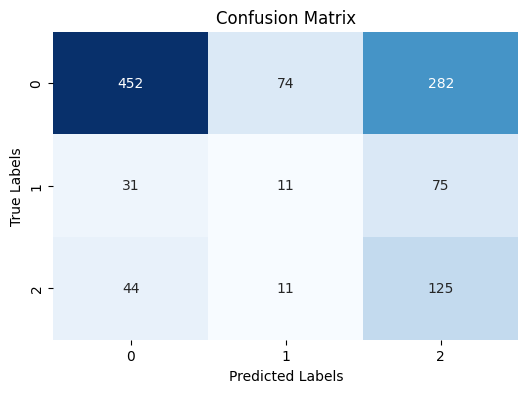


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 452/808 (55.94%)
Class 1: Correct Predictions / Total True Samples = 11/117 (9.40%)
Class 2: Correct Predictions / Total True Samples = 125/180 (69.44%)

Precision-Recall Curves:


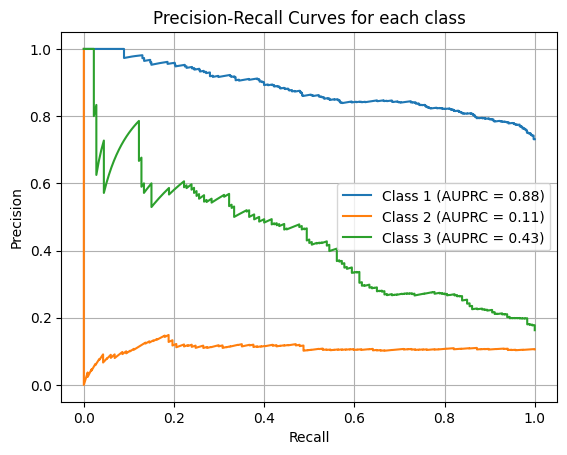


ROC Curves:


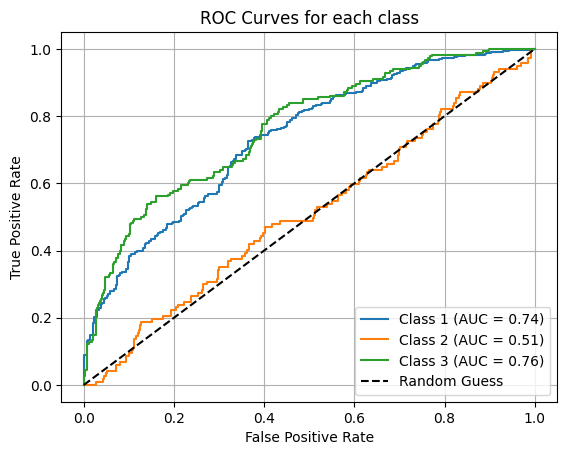


Mean F1 Score: 0.3860
Balanced Accuracy: 0.4493
Average AUPRC: 0.4737

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.56      0.68       808
           1       0.11      0.09      0.10       117
           2       0.26      0.69      0.38       180

    accuracy                           0.53      1105
   macro avg       0.41      0.45      0.39      1105
weighted avg       0.68      0.53      0.57      1105

Fold No: 3
Epoch [1/100], Loss: 1.3387, Accuracy: 0.3432
Validation Loss: 1.0698, Validation Accuracy: 0.4023
Epoch [2/100], Loss: 1.1110, Accuracy: 0.4026
Validation Loss: 1.0775, Validation Accuracy: 0.4557
Epoch [3/100], Loss: 1.0918, Accuracy: 0.4004
Validation Loss: 1.0856, Validation Accuracy: 0.4132
Epoch [4/100], Loss: 1.0827, Accuracy: 0.4268
Validation Loss: 1.0284, Validation Accuracy: 0.4990
Epoch [5/100], Loss: 1.0690, Accuracy: 0.4620
Validation Loss: 1.0104, Validation Accuracy: 0.4789
Epoch [6/100], Los

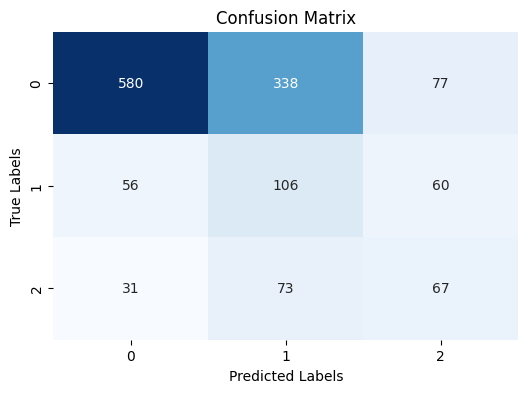


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 580/995 (58.29%)
Class 1: Correct Predictions / Total True Samples = 106/222 (47.75%)
Class 2: Correct Predictions / Total True Samples = 67/171 (39.18%)

Precision-Recall Curves:


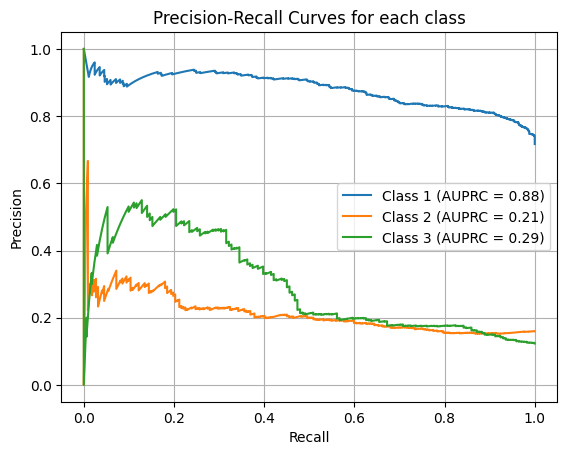


ROC Curves:


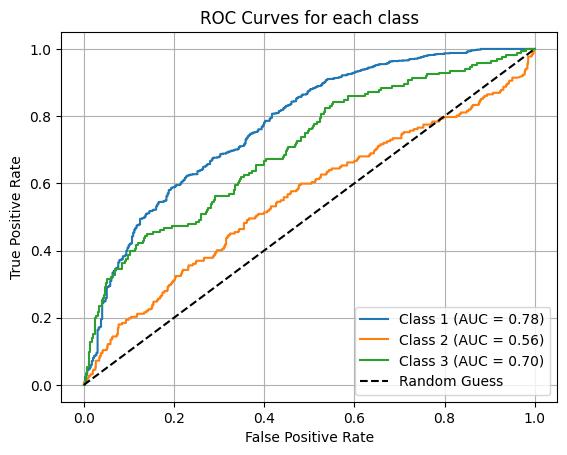


Mean F1 Score: 0.4474
Balanced Accuracy: 0.4841
Average AUPRC: 0.4604

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.58      0.70       995
           1       0.21      0.48      0.29       222
           2       0.33      0.39      0.36       171

    accuracy                           0.54      1388
   macro avg       0.47      0.48      0.45      1388
weighted avg       0.70      0.54      0.59      1388

Fold No: 4
Epoch [1/100], Loss: 1.3390, Accuracy: 0.3650
Validation Loss: 1.1080, Validation Accuracy: 0.3378
Epoch [2/100], Loss: 1.1001, Accuracy: 0.3650
Validation Loss: 1.1358, Validation Accuracy: 0.3960
Epoch [3/100], Loss: 1.0765, Accuracy: 0.4488
Validation Loss: 1.0586, Validation Accuracy: 0.3460
Epoch [4/100], Loss: 1.0664, Accuracy: 0.4516
Validation Loss: 1.0491, Validation Accuracy: 0.3802
Epoch [5/100], Loss: 1.0386, Accuracy: 0.5233
Validation Loss: 1.0022, Validation Accuracy: 0.4325
Epoch [6/100], Los

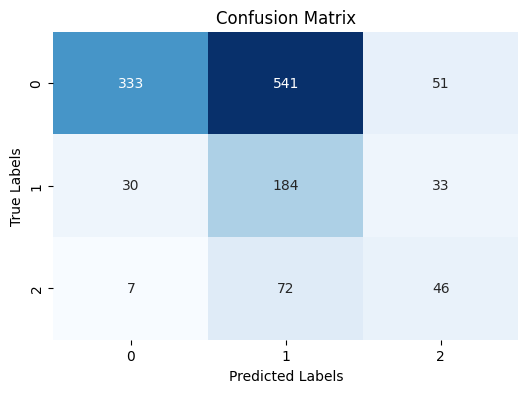


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 333/925 (36.00%)
Class 1: Correct Predictions / Total True Samples = 184/247 (74.49%)
Class 2: Correct Predictions / Total True Samples = 46/125 (36.80%)

Precision-Recall Curves:


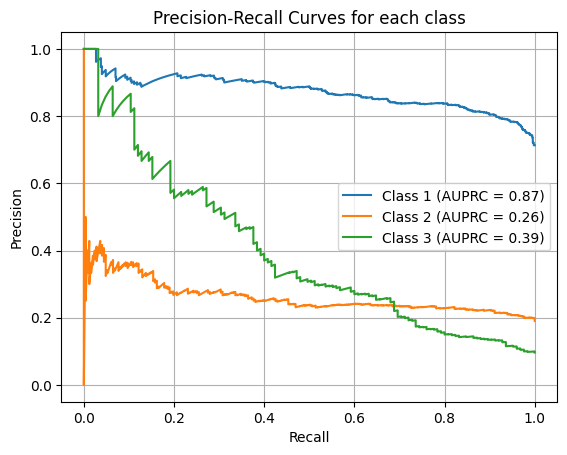


ROC Curves:


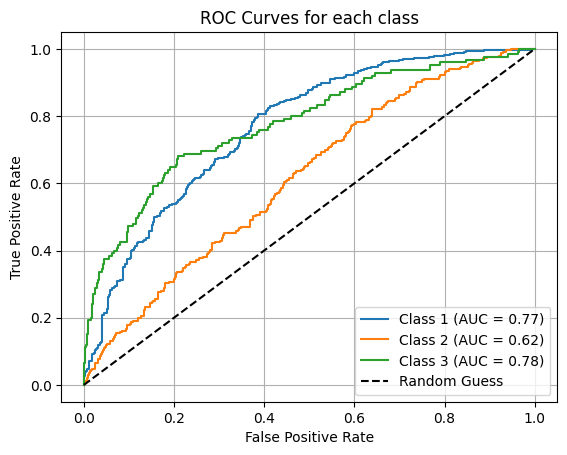


Mean F1 Score: 0.4092
Balanced Accuracy: 0.4910
Average AUPRC: 0.5083

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.36      0.51       925
           1       0.23      0.74      0.35       247
           2       0.35      0.37      0.36       125

    accuracy                           0.43      1297
   macro avg       0.49      0.49      0.41      1297
weighted avg       0.72      0.43      0.47      1297

Fold No: 5
Epoch [1/100], Loss: 1.2343, Accuracy: 0.3527
Validation Loss: 1.1386, Validation Accuracy: 0.3800
Epoch [2/100], Loss: 1.1081, Accuracy: 0.3587
Validation Loss: 1.1346, Validation Accuracy: 0.3413
Epoch [3/100], Loss: 1.1042, Accuracy: 0.3855
Validation Loss: 1.1381, Validation Accuracy: 0.3446
Epoch [4/100], Loss: 1.0921, Accuracy: 0.3908
Validation Loss: 1.1265, Validation Accuracy: 0.3931
Epoch [5/100], Loss: 1.0848, Accuracy: 0.4273
Validation Loss: 1.1653, Validation Accuracy: 0.4189
Epoch [6/100], Los

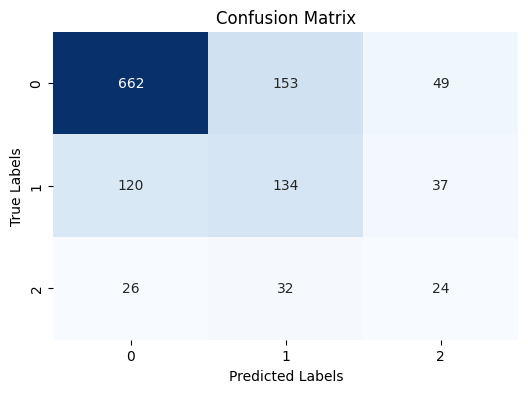


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 662/864 (76.62%)
Class 1: Correct Predictions / Total True Samples = 134/291 (46.05%)
Class 2: Correct Predictions / Total True Samples = 24/82 (29.27%)

Precision-Recall Curves:


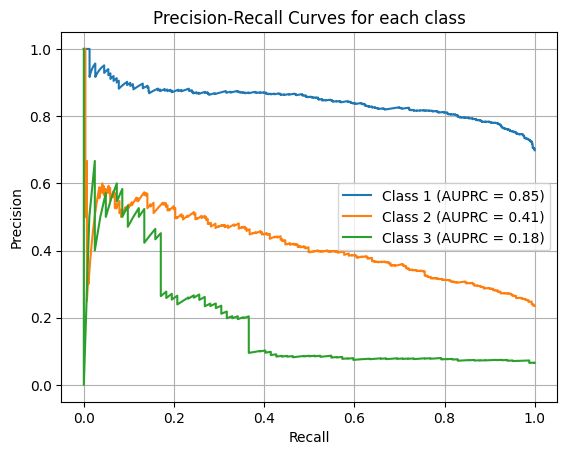


ROC Curves:


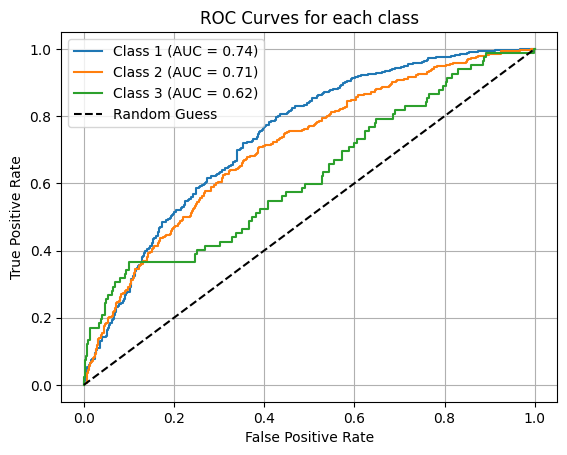


Mean F1 Score: 0.4937
Balanced Accuracy: 0.5065
Average AUPRC: 0.4798

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       864
           1       0.42      0.46      0.44       291
           2       0.22      0.29      0.25        82

    accuracy                           0.66      1237
   macro avg       0.49      0.51      0.49      1237
weighted avg       0.69      0.66      0.67      1237

Accuracy for each fold: [np.float64(0.5579040971061482), np.float64(0.4492891596851993), np.float64(0.484068305279625), np.float64(0.4909797570850203), np.float64(0.5064559100631097)]
AUPRC for each fold: [np.float64(0.5488462133455468), np.float64(0.4737195659254394), np.float64(0.4604333603177974), np.float64(0.5083124912058283), np.float64(0.4797608928453776)]
Average AUPRC across all folds: 0.4942145047279979
Average Balanced Accuracy across all folds: 0.4977394458438205
Results saved to D:\PYTHONIG\newwindow\NOTEB

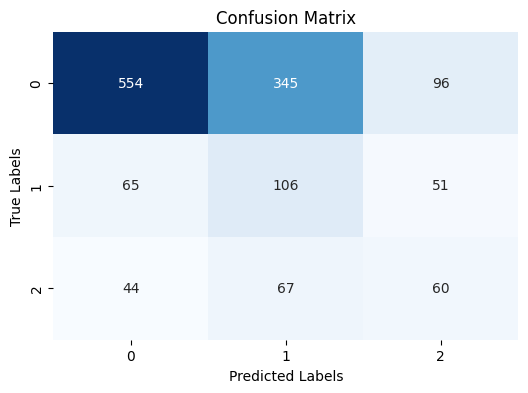


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 554/995 (55.68%)
Class 1: Correct Predictions / Total True Samples = 106/222 (47.75%)
Class 2: Correct Predictions / Total True Samples = 60/171 (35.09%)

Precision-Recall Curves:


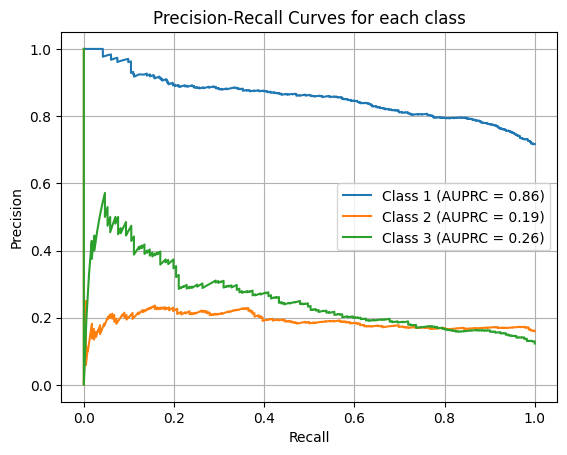


ROC Curves:


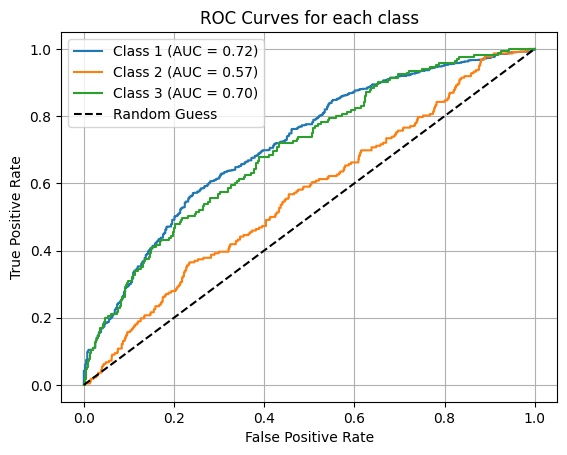


Mean F1 Score: 0.4241
Balanced Accuracy: 0.4617
Average AUPRC: 0.4335

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67       995
           1       0.20      0.48      0.29       222
           2       0.29      0.35      0.32       171

    accuracy                           0.52      1388
   macro avg       0.44      0.46      0.42      1388
weighted avg       0.67      0.52      0.56      1388

Fold No: 2
Epoch [1/100], Loss: 1.1332, Accuracy: 0.3529
Validation Loss: 1.0804, Validation Accuracy: 0.3558
Epoch [2/100], Loss: 1.1097, Accuracy: 0.3948
Validation Loss: 1.1090, Validation Accuracy: 0.4047
Epoch [3/100], Loss: 1.0913, Accuracy: 0.3966
Validation Loss: 1.0764, Validation Accuracy: 0.3844
Epoch [4/100], Loss: 1.0982, Accuracy: 0.4115
Validation Loss: 1.0720, Validation Accuracy: 0.3488
Epoch [5/100], Loss: 1.0886, Accuracy: 0.4134
Validation Loss: 1.0811, Validation Accuracy: 0.3646
Epoch [6/100], Los

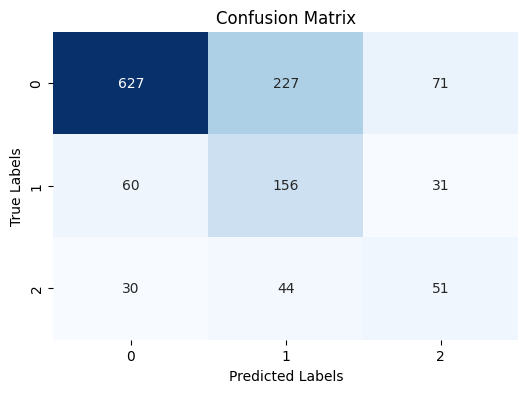


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 627/925 (67.78%)
Class 1: Correct Predictions / Total True Samples = 156/247 (63.16%)
Class 2: Correct Predictions / Total True Samples = 51/125 (40.80%)

Precision-Recall Curves:


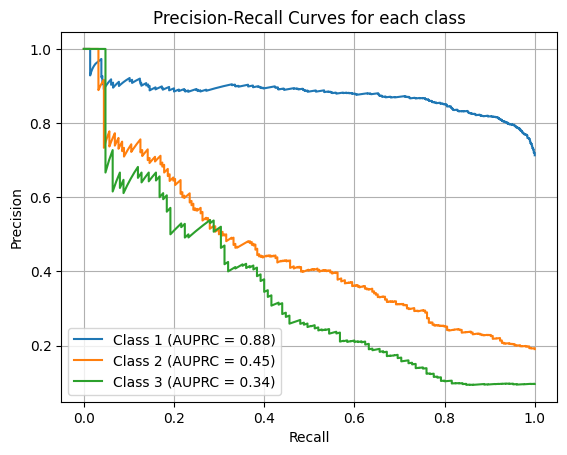


ROC Curves:


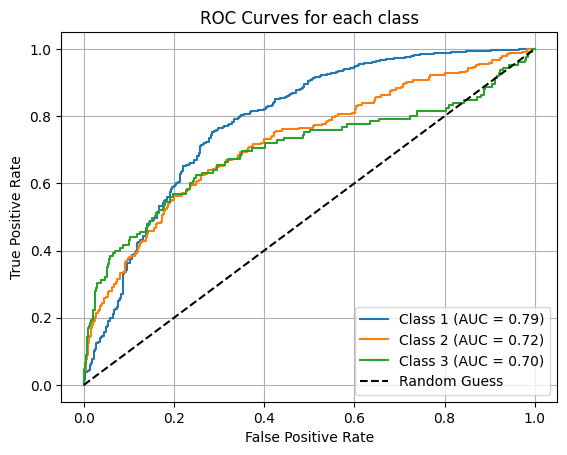


Mean F1 Score: 0.5312
Balanced Accuracy: 0.5725
Average AUPRC: 0.5552

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       925
           1       0.37      0.63      0.46       247
           2       0.33      0.41      0.37       125

    accuracy                           0.64      1297
   macro avg       0.52      0.57      0.53      1297
weighted avg       0.73      0.64      0.67      1297

Fold No: 3
Epoch [1/100], Loss: 1.3483, Accuracy: 0.3287
Validation Loss: 1.0363, Validation Accuracy: 0.3330
Epoch [2/100], Loss: 1.1116, Accuracy: 0.3464
Validation Loss: 1.1044, Validation Accuracy: 0.3549
Epoch [3/100], Loss: 1.0995, Accuracy: 0.3610
Validation Loss: 1.1021, Validation Accuracy: 0.3662
Epoch [4/100], Loss: 1.0981, Accuracy: 0.3811
Validation Loss: 1.0382, Validation Accuracy: 0.3647
Epoch [5/100], Loss: 1.0892, Accuracy: 0.4126
Validation Loss: 1.0335, Validation Accuracy: 0.3604
Epoch [6/100], Los

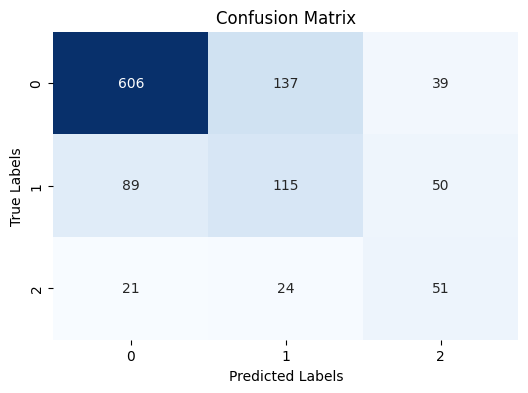


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 606/782 (77.49%)
Class 1: Correct Predictions / Total True Samples = 115/254 (45.28%)
Class 2: Correct Predictions / Total True Samples = 51/96 (53.12%)

Precision-Recall Curves:


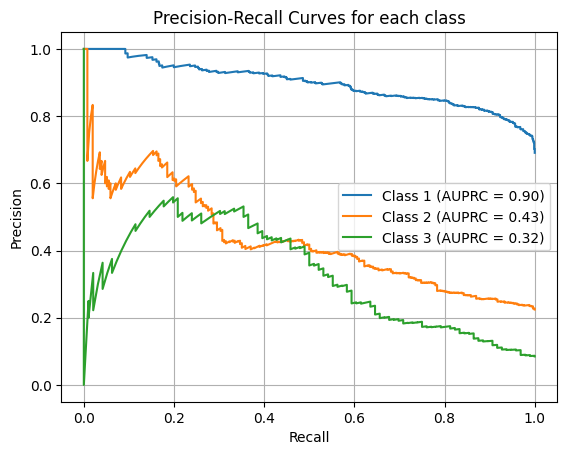


ROC Curves:


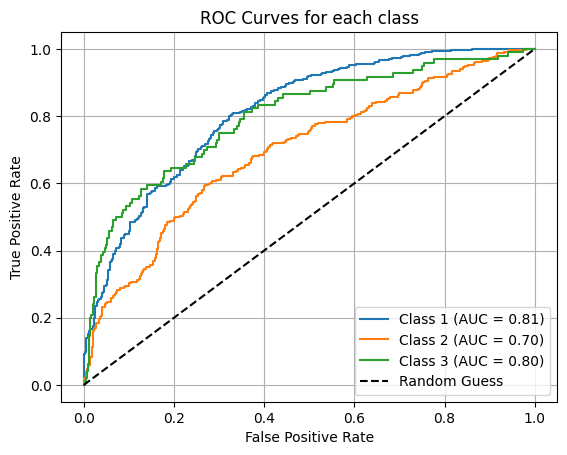


Mean F1 Score: 0.5584
Balanced Accuracy: 0.5863
Average AUPRC: 0.5491

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       782
           1       0.42      0.45      0.43       254
           2       0.36      0.53      0.43        96

    accuracy                           0.68      1132
   macro avg       0.54      0.59      0.56      1132
weighted avg       0.71      0.68      0.69      1132

Fold No: 4
Epoch [1/100], Loss: 1.2155, Accuracy: 0.3599
Validation Loss: 1.0907, Validation Accuracy: 0.3739
Epoch [2/100], Loss: 1.1025, Accuracy: 0.3768
Validation Loss: 1.1304, Validation Accuracy: 0.4003
Epoch [3/100], Loss: 1.1052, Accuracy: 0.3529
Validation Loss: 1.0503, Validation Accuracy: 0.3791
Epoch [4/100], Loss: 1.0929, Accuracy: 0.4006
Validation Loss: 1.0753, Validation Accuracy: 0.4009
Epoch [5/100], Loss: 1.0923, Accuracy: 0.4048
Validation Loss: 1.0523, Validation Accuracy: 0.3682
Epoch [6/100], Los

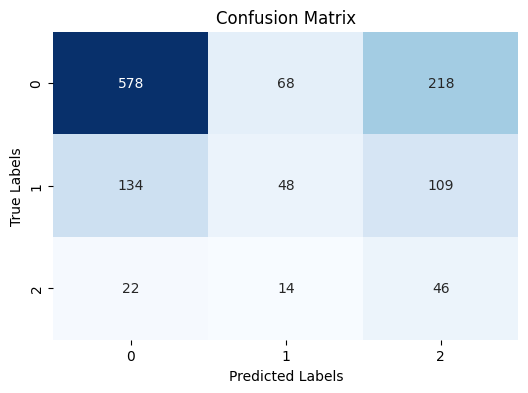


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 578/864 (66.90%)
Class 1: Correct Predictions / Total True Samples = 48/291 (16.49%)
Class 2: Correct Predictions / Total True Samples = 46/82 (56.10%)

Precision-Recall Curves:


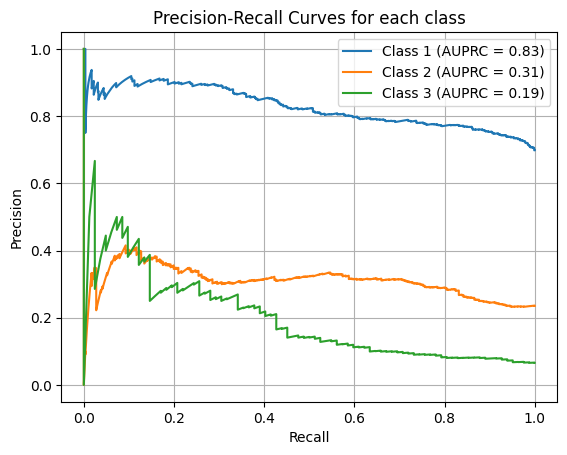


ROC Curves:


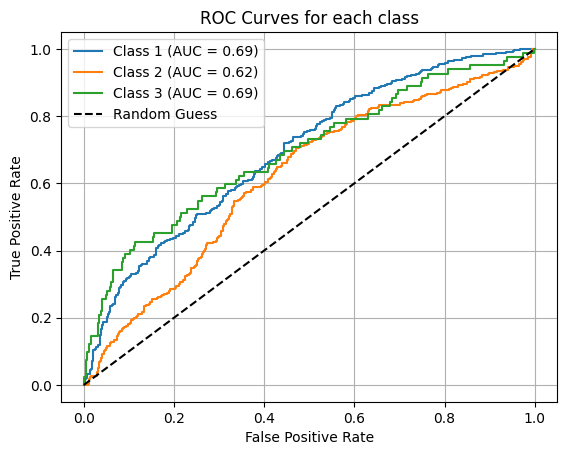


Mean F1 Score: 0.3845
Balanced Accuracy: 0.4650
Average AUPRC: 0.4424

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       864
           1       0.37      0.16      0.23       291
           2       0.12      0.56      0.20        82

    accuracy                           0.54      1237
   macro avg       0.43      0.46      0.38      1237
weighted avg       0.65      0.54      0.57      1237

Fold No: 5
Epoch [1/100], Loss: 1.2301, Accuracy: 0.3376
Validation Loss: 1.1847, Validation Accuracy: 0.3364
Epoch [2/100], Loss: 1.1103, Accuracy: 0.3512
Validation Loss: 1.1045, Validation Accuracy: 0.3508
Epoch [3/100], Loss: 1.1036, Accuracy: 0.3665
Validation Loss: 1.0688, Validation Accuracy: 0.3894
Epoch [4/100], Loss: 1.1031, Accuracy: 0.3571
Validation Loss: 1.1492, Validation Accuracy: 0.3847
Epoch [5/100], Loss: 1.0875, Accuracy: 0.4039
Validation Loss: 1.2810, Validation Accuracy: 0.3797
Epoch [6/100], Los

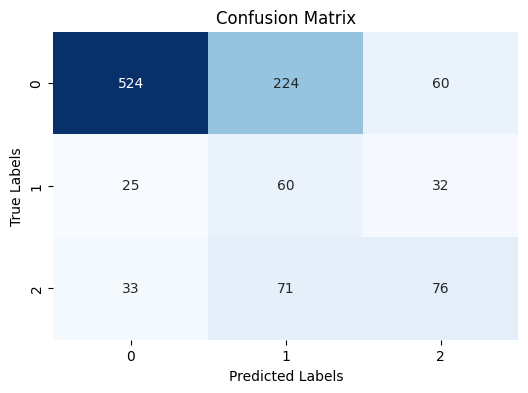


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 524/808 (64.85%)
Class 1: Correct Predictions / Total True Samples = 60/117 (51.28%)
Class 2: Correct Predictions / Total True Samples = 76/180 (42.22%)

Precision-Recall Curves:


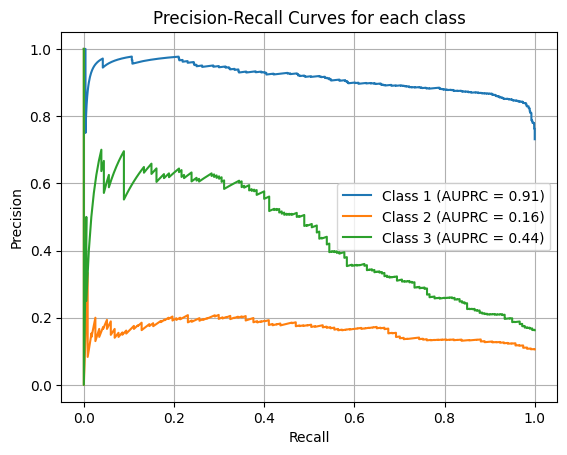


ROC Curves:


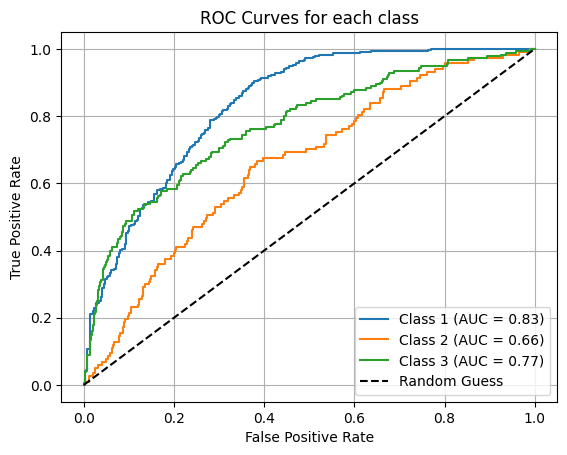


Mean F1 Score: 0.4817
Balanced Accuracy: 0.5279
Average AUPRC: 0.5056

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.65      0.75       808
           1       0.17      0.51      0.25       117
           2       0.45      0.42      0.44       180

    accuracy                           0.60      1105
   macro avg       0.51      0.53      0.48      1105
weighted avg       0.75      0.60      0.65      1105

Accuracy for each fold: [np.float64(0.4617128633526412), np.float64(0.5724722617354195), np.float64(0.5863139889642951), np.float64(0.46496851494860886), np.float64(0.5278525288426279)]
AUPRC for each fold: [np.float64(0.43351321179020835), np.float64(0.555154553295632), np.float64(0.5491143729713984), np.float64(0.44239468503327767), np.float64(0.505598195635967)]
Average AUPRC across all folds: 0.49715500374529675
Average Balanced Accuracy across all folds: 0.5226640315687184
Results saved to D:\PYTHONIG\newwindow\NO

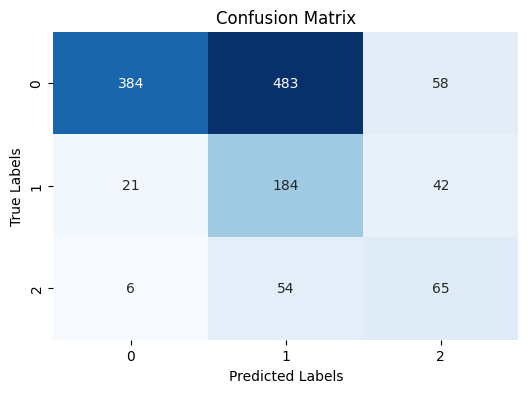


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 384/925 (41.51%)
Class 1: Correct Predictions / Total True Samples = 184/247 (74.49%)
Class 2: Correct Predictions / Total True Samples = 65/125 (52.00%)

Precision-Recall Curves:


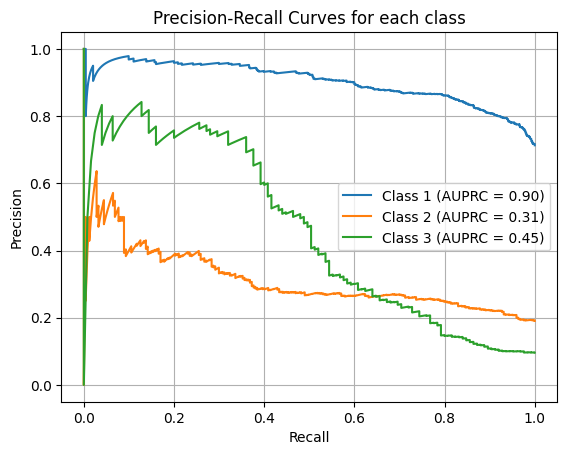


ROC Curves:


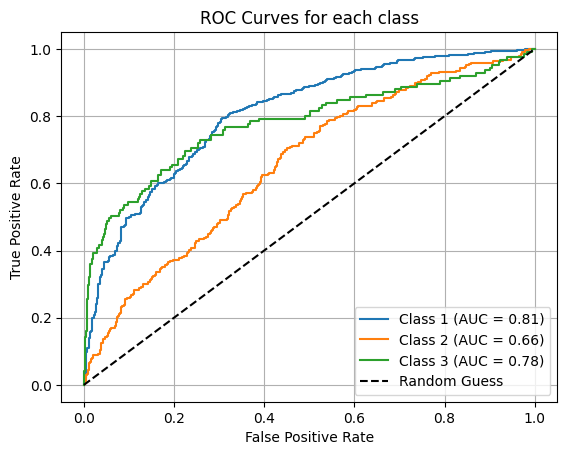


Mean F1 Score: 0.4678
Balanced Accuracy: 0.5600
Average AUPRC: 0.5545

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.42      0.57       925
           1       0.26      0.74      0.38       247
           2       0.39      0.52      0.45       125

    accuracy                           0.49      1297
   macro avg       0.53      0.56      0.47      1297
weighted avg       0.75      0.49      0.53      1297

Fold No: 2
Epoch [1/100], Loss: 1.2908, Accuracy: 0.3287
Validation Loss: 1.2713, Validation Accuracy: 0.3947
Epoch [2/100], Loss: 1.1097, Accuracy: 0.3445
Validation Loss: 1.1470, Validation Accuracy: 0.3831
Epoch [3/100], Loss: 1.1102, Accuracy: 0.3715
Validation Loss: 1.0248, Validation Accuracy: 0.3333
Epoch [4/100], Loss: 1.1133, Accuracy: 0.3790
Validation Loss: 1.1078, Validation Accuracy: 0.3570
Epoch [5/100], Loss: 1.0912, Accuracy: 0.3855
Validation Loss: 1.0857, Validation Accuracy: 0.3668
Epoch [6/100], Los

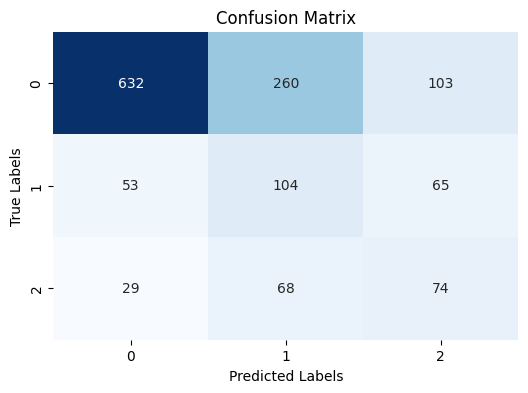


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 632/995 (63.52%)
Class 1: Correct Predictions / Total True Samples = 104/222 (46.85%)
Class 2: Correct Predictions / Total True Samples = 74/171 (43.27%)

Precision-Recall Curves:


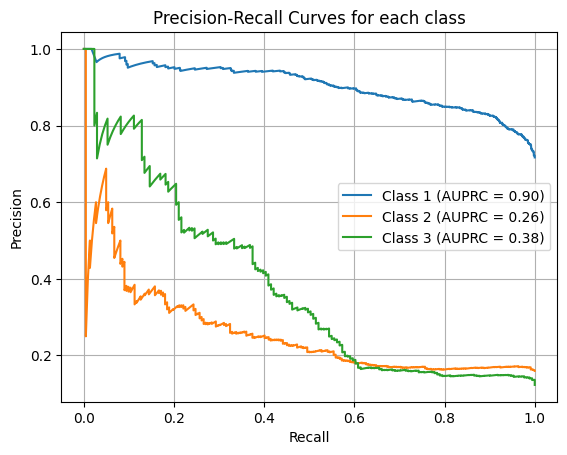


ROC Curves:


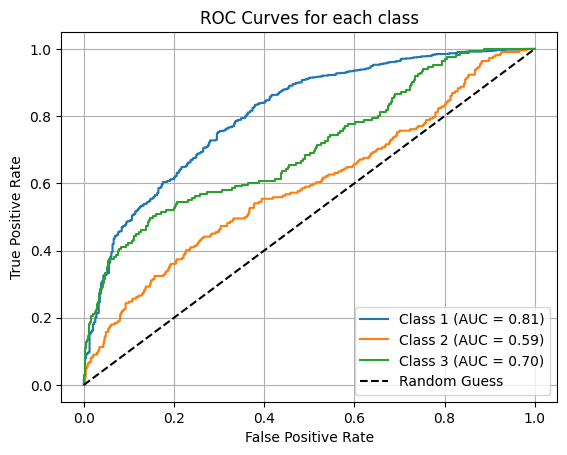


Mean F1 Score: 0.4720
Balanced Accuracy: 0.5121
Average AUPRC: 0.5122

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.64      0.74       995
           1       0.24      0.47      0.32       222
           2       0.31      0.43      0.36       171

    accuracy                           0.58      1388
   macro avg       0.48      0.51      0.47      1388
weighted avg       0.71      0.58      0.63      1388

Fold No: 3
Epoch [1/100], Loss: 1.3126, Accuracy: 0.3264
Validation Loss: 1.1853, Validation Accuracy: 0.3093
Epoch [2/100], Loss: 1.1086, Accuracy: 0.3402
Validation Loss: 1.1174, Validation Accuracy: 0.3355
Epoch [3/100], Loss: 1.1030, Accuracy: 0.3781
Validation Loss: 1.1361, Validation Accuracy: 0.4050
Epoch [4/100], Loss: 1.1027, Accuracy: 0.3652
Validation Loss: 1.2215, Validation Accuracy: 0.3155
Epoch [5/100], Loss: 1.0971, Accuracy: 0.3928
Validation Loss: 1.1056, Validation Accuracy: 0.4063
Epoch [6/100], Los

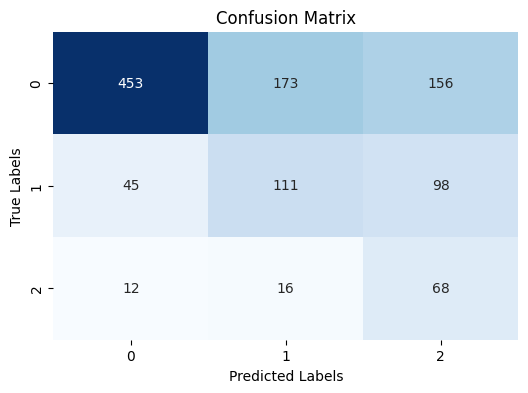


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 453/782 (57.93%)
Class 1: Correct Predictions / Total True Samples = 111/254 (43.70%)
Class 2: Correct Predictions / Total True Samples = 68/96 (70.83%)

Precision-Recall Curves:


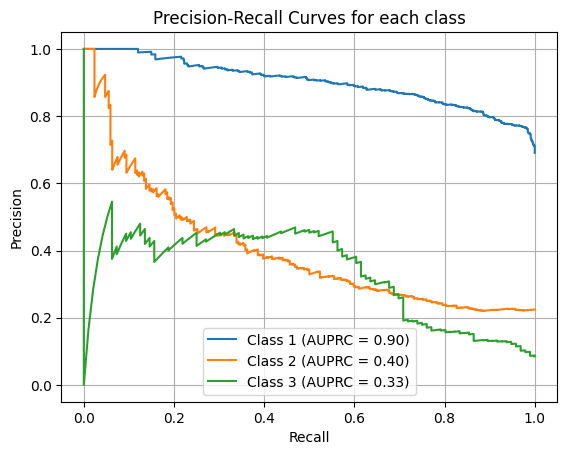


ROC Curves:


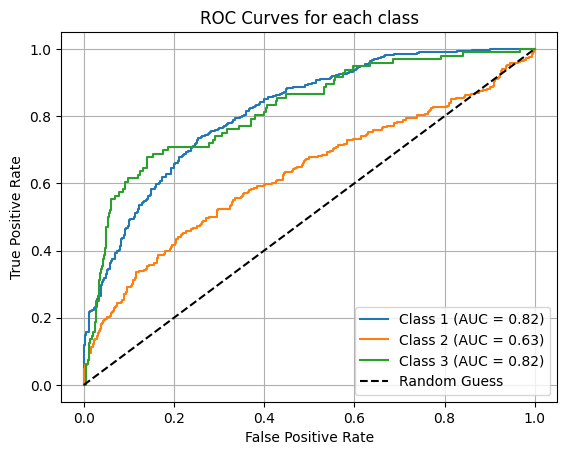


Mean F1 Score: 0.4758
Balanced Accuracy: 0.5749
Average AUPRC: 0.5437

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       782
           1       0.37      0.44      0.40       254
           2       0.21      0.71      0.33        96

    accuracy                           0.56      1132
   macro avg       0.49      0.57      0.48      1132
weighted avg       0.71      0.56      0.60      1132

Fold No: 4
Epoch [1/100], Loss: 1.2533, Accuracy: 0.3289
Validation Loss: 1.1821, Validation Accuracy: 0.3952
Epoch [2/100], Loss: 1.1152, Accuracy: 0.3474
Validation Loss: 1.0428, Validation Accuracy: 0.3333
Epoch [3/100], Loss: 1.1231, Accuracy: 0.3439
Validation Loss: 1.1471, Validation Accuracy: 0.3589
Epoch [4/100], Loss: 1.1062, Accuracy: 0.3607
Validation Loss: 1.0804, Validation Accuracy: 0.3869
Epoch [5/100], Loss: 1.1038, Accuracy: 0.3774
Validation Loss: 1.1438, Validation Accuracy: 0.4152
Epoch [6/100], Los

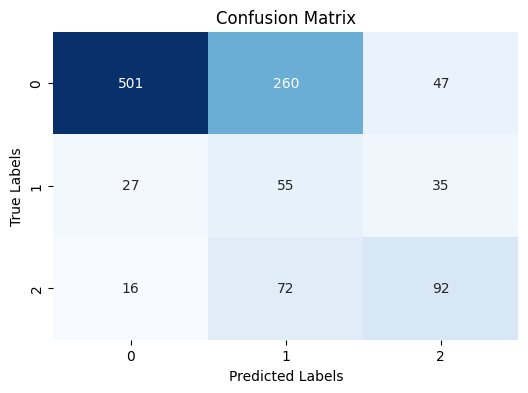


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 501/808 (62.00%)
Class 1: Correct Predictions / Total True Samples = 55/117 (47.01%)
Class 2: Correct Predictions / Total True Samples = 92/180 (51.11%)

Precision-Recall Curves:


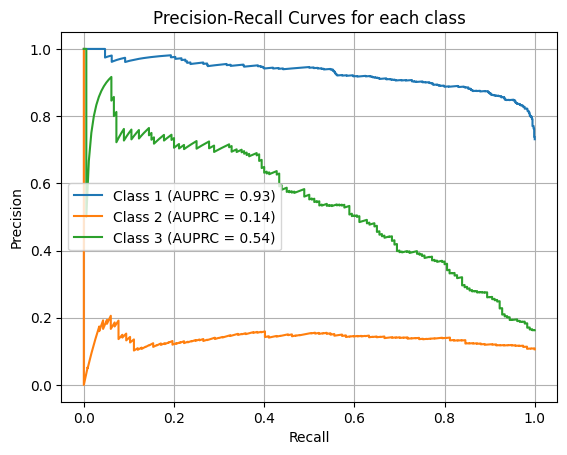


ROC Curves:


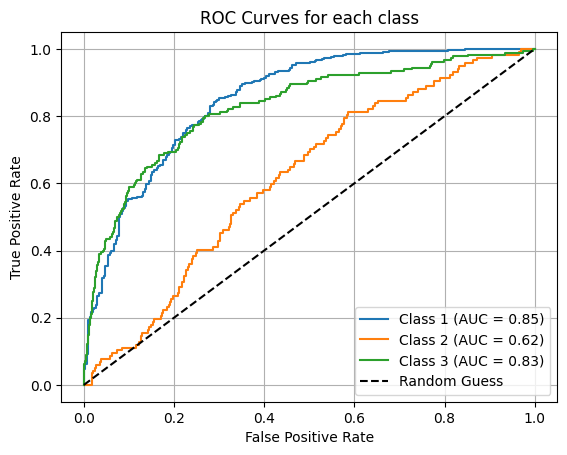


Mean F1 Score: 0.4931
Balanced Accuracy: 0.5337
Average AUPRC: 0.5359

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74       808
           1       0.14      0.47      0.22       117
           2       0.53      0.51      0.52       180

    accuracy                           0.59      1105
   macro avg       0.53      0.53      0.49      1105
weighted avg       0.77      0.59      0.65      1105

Fold No: 5
Epoch [1/100], Loss: 1.2502, Accuracy: 0.3265
Validation Loss: 1.0480, Validation Accuracy: 0.3325
Epoch [2/100], Loss: 1.1141, Accuracy: 0.3070
Validation Loss: 1.0976, Validation Accuracy: 0.3441
Epoch [3/100], Loss: 1.1138, Accuracy: 0.3367
Validation Loss: 1.1483, Validation Accuracy: 0.3387
Epoch [4/100], Loss: 1.1111, Accuracy: 0.3537
Validation Loss: 1.1060, Validation Accuracy: 0.4582
Epoch [5/100], Loss: 1.1007, Accuracy: 0.3767
Validation Loss: 1.1267, Validation Accuracy: 0.4163
Epoch [6/100], Los

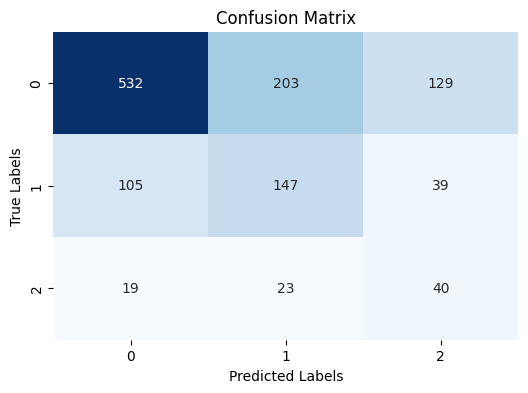


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 532/864 (61.57%)
Class 1: Correct Predictions / Total True Samples = 147/291 (50.52%)
Class 2: Correct Predictions / Total True Samples = 40/82 (48.78%)

Precision-Recall Curves:


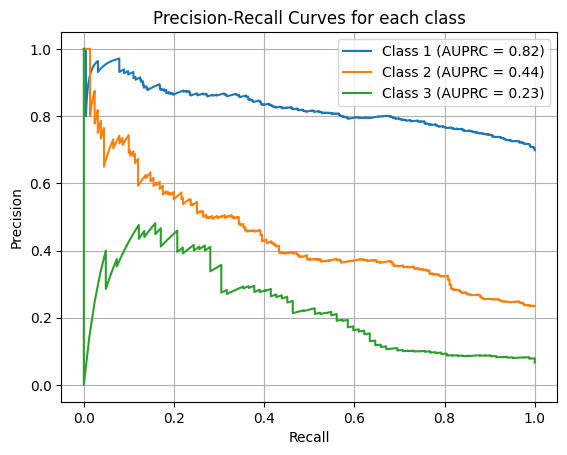


ROC Curves:


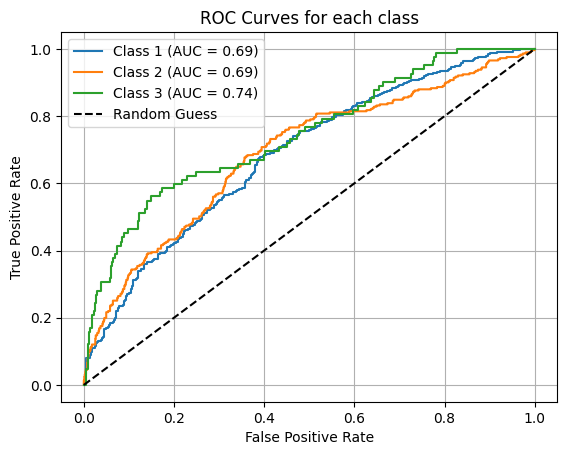


Mean F1 Score: 0.4729
Balanced Accuracy: 0.5362
Average AUPRC: 0.4976

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       864
           1       0.39      0.51      0.44       291
           2       0.19      0.49      0.28        82

    accuracy                           0.58      1237
   macro avg       0.47      0.54      0.47      1237
weighted avg       0.67      0.58      0.61      1237

Accuracy for each fold: [np.float64(0.5600248021300653), np.float64(0.5121309619590497), np.float64(0.574875031605704), np.float64(0.5337486953823588), np.float64(0.536233419321593)]
AUPRC for each fold: [np.float64(0.5545026239770983), np.float64(0.5122255222997102), np.float64(0.5436994953042994), np.float64(0.535911827090696), np.float64(0.4975938397939312)]
Average AUPRC across all folds: 0.5287866616931469
Average Balanced Accuracy across all folds: 0.5434025820797542
Results saved to D:\PYTHONIG\newwindow\NOTEBOO

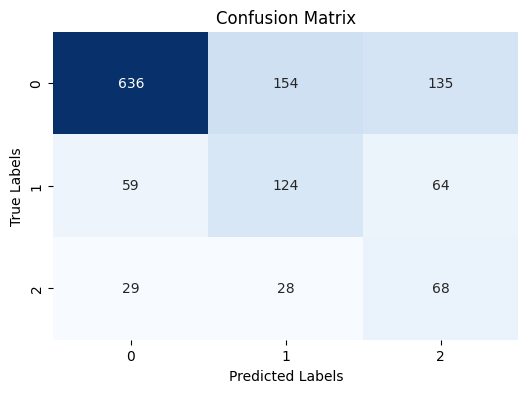


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 636/925 (68.76%)
Class 1: Correct Predictions / Total True Samples = 124/247 (50.20%)
Class 2: Correct Predictions / Total True Samples = 68/125 (54.40%)

Precision-Recall Curves:


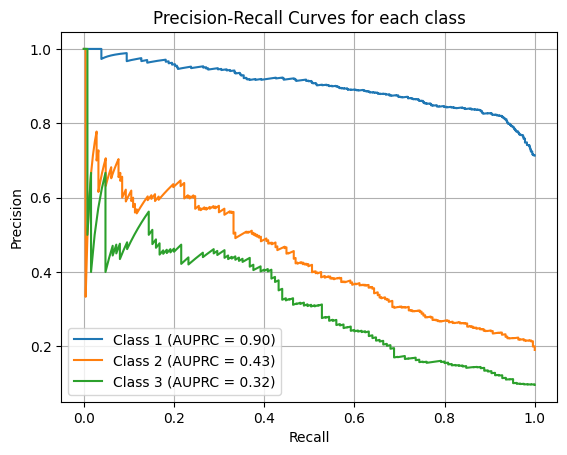


ROC Curves:


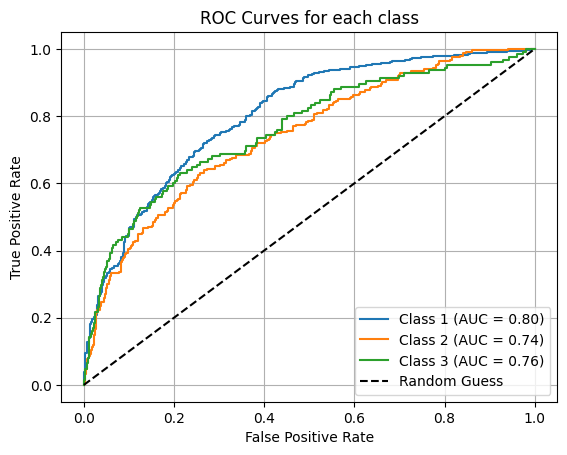


Mean F1 Score: 0.5223
Balanced Accuracy: 0.5779
Average AUPRC: 0.5502

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       925
           1       0.41      0.50      0.45       247
           2       0.25      0.54      0.35       125

    accuracy                           0.64      1297
   macro avg       0.51      0.58      0.52      1297
weighted avg       0.73      0.64      0.67      1297

Fold No: 2
Epoch [1/100], Loss: 1.2436, Accuracy: 0.3563
Validation Loss: 1.1295, Validation Accuracy: 0.3691
Epoch [2/100], Loss: 1.1142, Accuracy: 0.3496
Validation Loss: 1.0527, Validation Accuracy: 0.3509
Epoch [3/100], Loss: 1.1110, Accuracy: 0.3572
Validation Loss: 1.0708, Validation Accuracy: 0.4131
Epoch [4/100], Loss: 1.0991, Accuracy: 0.3754
Validation Loss: 1.1320, Validation Accuracy: 0.4147
Epoch [5/100], Loss: 1.0973, Accuracy: 0.3849
Validation Loss: 1.0838, Validation Accuracy: 0.3891
Epoch [6/100], Los

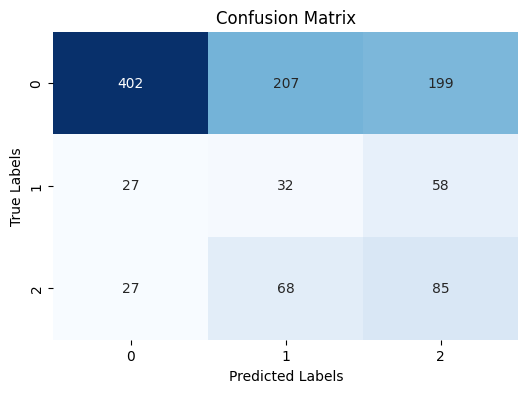


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 402/808 (49.75%)
Class 1: Correct Predictions / Total True Samples = 32/117 (27.35%)
Class 2: Correct Predictions / Total True Samples = 85/180 (47.22%)

Precision-Recall Curves:


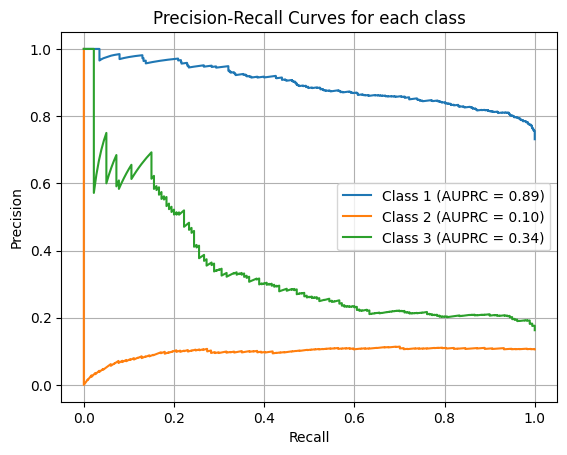


ROC Curves:


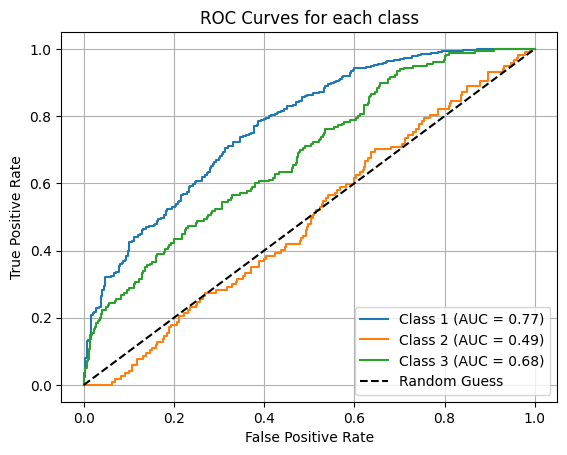


Mean F1 Score: 0.3709
Balanced Accuracy: 0.4144
Average AUPRC: 0.4457

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.50      0.64       808
           1       0.10      0.27      0.15       117
           2       0.25      0.47      0.33       180

    accuracy                           0.47      1105
   macro avg       0.41      0.41      0.37      1105
weighted avg       0.70      0.47      0.53      1105

Fold No: 3
Epoch [1/100], Loss: 1.2356, Accuracy: 0.3439
Validation Loss: 1.1561, Validation Accuracy: 0.3585
Epoch [2/100], Loss: 1.0998, Accuracy: 0.3871
Validation Loss: 1.0878, Validation Accuracy: 0.4429
Epoch [3/100], Loss: 1.0878, Accuracy: 0.4198
Validation Loss: 1.1008, Validation Accuracy: 0.4266
Epoch [4/100], Loss: 1.0897, Accuracy: 0.4189
Validation Loss: 0.9991, Validation Accuracy: 0.4187
Epoch [5/100], Loss: 1.0591, Accuracy: 0.4709
Validation Loss: 1.0838, Validation Accuracy: 0.3953
Epoch [6/100], Los

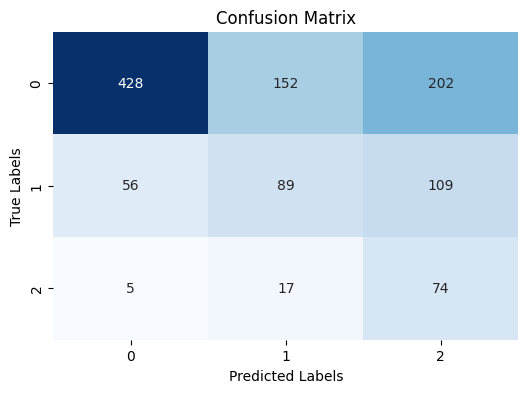


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 428/782 (54.73%)
Class 1: Correct Predictions / Total True Samples = 89/254 (35.04%)
Class 2: Correct Predictions / Total True Samples = 74/96 (77.08%)

Precision-Recall Curves:


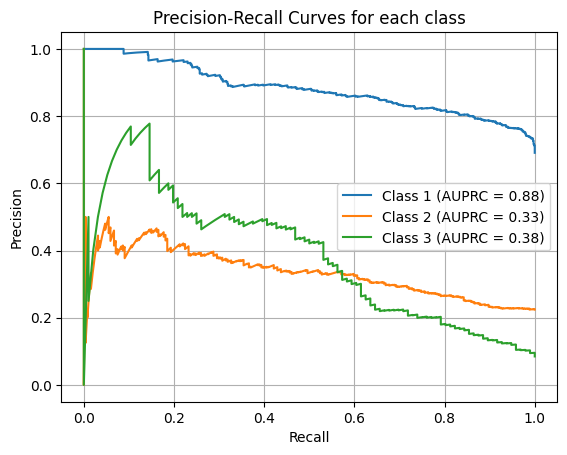


ROC Curves:


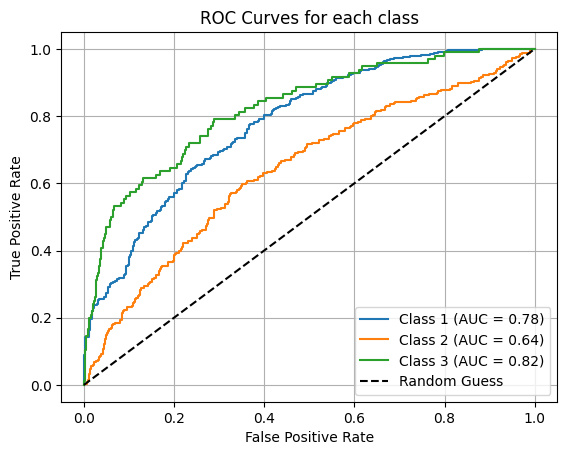


Mean F1 Score: 0.4429
Balanced Accuracy: 0.5562
Average AUPRC: 0.5300

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.55      0.67       782
           1       0.34      0.35      0.35       254
           2       0.19      0.77      0.31        96

    accuracy                           0.52      1132
   macro avg       0.47      0.56      0.44      1132
weighted avg       0.70      0.52      0.57      1132

Fold No: 4
Epoch [1/100], Loss: 1.1440, Accuracy: 0.3635
Validation Loss: 1.0099, Validation Accuracy: 0.3578
Epoch [2/100], Loss: 1.1033, Accuracy: 0.3764
Validation Loss: 1.1115, Validation Accuracy: 0.4121
Epoch [3/100], Loss: 1.0887, Accuracy: 0.4143
Validation Loss: 1.0104, Validation Accuracy: 0.4723
Epoch [4/100], Loss: 1.0737, Accuracy: 0.4488
Validation Loss: 0.9613, Validation Accuracy: 0.4103
Epoch [5/100], Loss: 1.0553, Accuracy: 0.5039
Validation Loss: 0.9336, Validation Accuracy: 0.4581
Epoch [6/100], Los

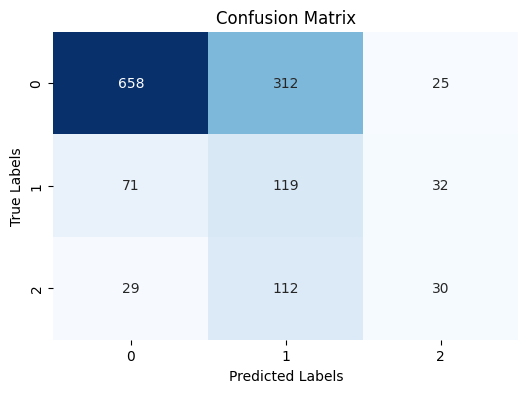


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 658/995 (66.13%)
Class 1: Correct Predictions / Total True Samples = 119/222 (53.60%)
Class 2: Correct Predictions / Total True Samples = 30/171 (17.54%)

Precision-Recall Curves:


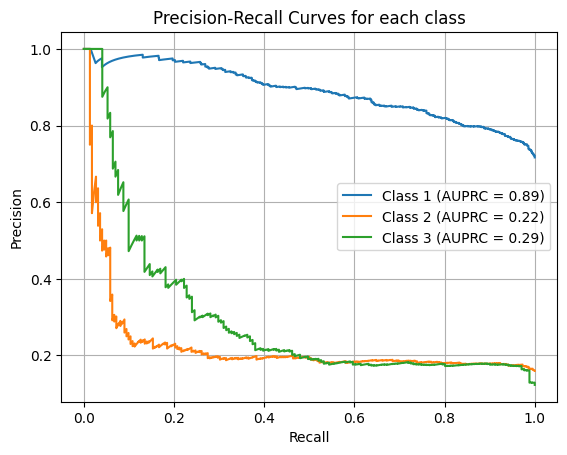


ROC Curves:


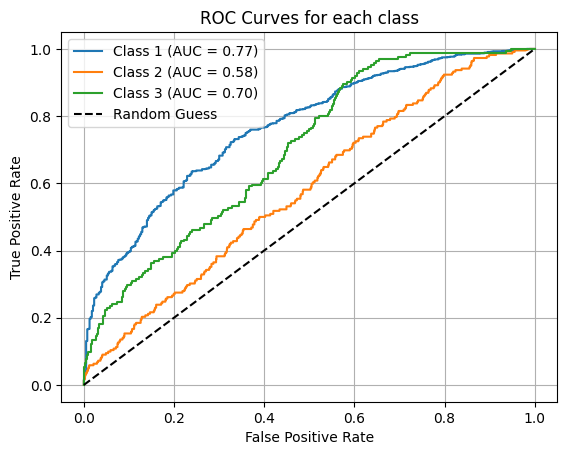


Mean F1 Score: 0.4315
Balanced Accuracy: 0.4576
Average AUPRC: 0.4694

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       995
           1       0.22      0.54      0.31       222
           2       0.34      0.18      0.23       171

    accuracy                           0.58      1388
   macro avg       0.48      0.46      0.43      1388
weighted avg       0.70      0.58      0.62      1388

Fold No: 5
Epoch [1/100], Loss: 1.3298, Accuracy: 0.3392
Validation Loss: 1.0198, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1045, Accuracy: 0.3741
Validation Loss: 1.1187, Validation Accuracy: 0.3338
Epoch [3/100], Loss: 1.1019, Accuracy: 0.3932
Validation Loss: 1.2153, Validation Accuracy: 0.3201
Epoch [4/100], Loss: 1.0850, Accuracy: 0.4206
Validation Loss: 1.0510, Validation Accuracy: 0.3760
Epoch [5/100], Loss: 1.0813, Accuracy: 0.4140
Validation Loss: 1.0908, Validation Accuracy: 0.3745
Epoch [6/100], Los

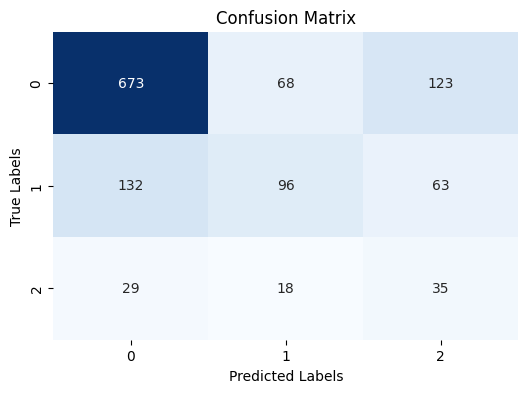


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 673/864 (77.89%)
Class 1: Correct Predictions / Total True Samples = 96/291 (32.99%)
Class 2: Correct Predictions / Total True Samples = 35/82 (42.68%)

Precision-Recall Curves:


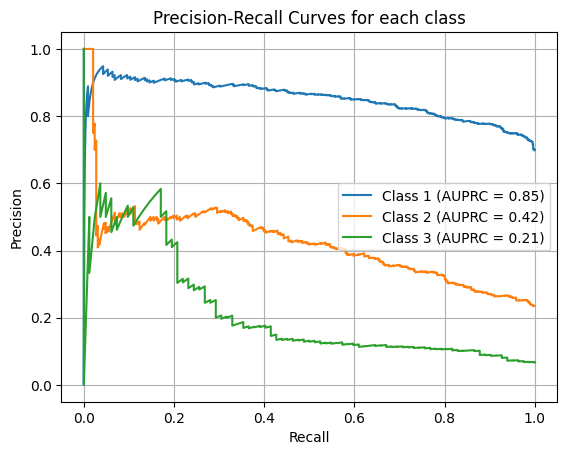


ROC Curves:


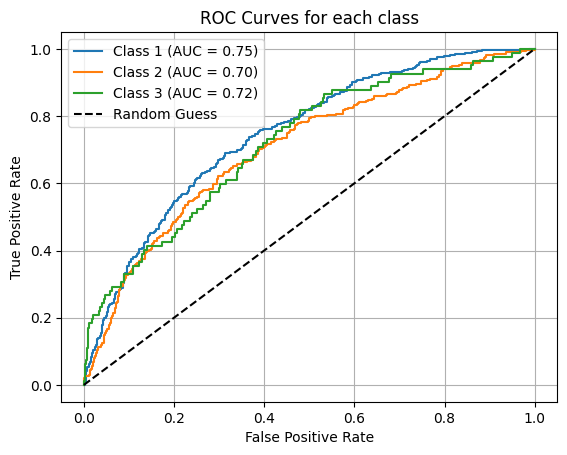


Mean F1 Score: 0.4765
Balanced Accuracy: 0.5119
Average AUPRC: 0.4947

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       864
           1       0.53      0.33      0.41       291
           2       0.16      0.43      0.23        82

    accuracy                           0.65      1237
   macro avg       0.50      0.51      0.48      1237
weighted avg       0.70      0.65      0.66      1237

Accuracy for each fold: [np.float64(0.5778639530218478), np.float64(0.4144170827339144), np.float64(0.5561805373752833), np.float64(0.4575937217301935), np.float64(0.5118871202314543)]
AUPRC for each fold: [np.float64(0.5501759331559164), np.float64(0.4457064185342909), np.float64(0.5300079426564528), np.float64(0.4694054565660785), np.float64(0.4946599478799148)]
Average AUPRC across all folds: 0.4979911397585307
Average Balanced Accuracy across all folds: 0.5035884830185386
Results saved to D:\PYTHONIG\newwindow\NOTE

In [9]:
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc



best_hyperparameters = [
    {  # Trial 49: Accuracy = 0.5325
        'ff_dim': 2048,
        'dropout_rate': 0.1696505706058007,
        'embed_dim': 256,
        'learning_rate': 6.239041462802021e-05,
        'optimizer': 'AdamW',
        'weight_decay': 0.0004388941414635483,
        'batch_size': 32,
        'num_heads': 2,
        'num_transformer_blocks': 4
    },
    {  # Trial 35: Accuracy = 0.5265
        'ff_dim': 32,
        'dropout_rate': 0.14314115443369435,
        'embed_dim': 256,
        'learning_rate': 0.00018976355911903259,
        'optimizer': 'AdamW',
        'weight_decay': 3.2372972585945294e-05,
        'batch_size': 10,
        'num_heads': 1,
        'num_transformer_blocks': 1
    },
    {  # Trial 72: Accuracy = 0.5216
        'ff_dim': 64,
        'dropout_rate': 0.14721312685926044,
        'embed_dim': 256,
        'learning_rate': 6.651243311623869e-05,
        'optimizer': 'AdamW',
        'weight_decay': 0.0005758983656646324,
        'batch_size': 32,
        'num_heads': 2,
        'num_transformer_blocks': 4
    },
    {  # Trial 53: Accuracy = 0.5212
        'ff_dim': 2048,
        'dropout_rate': 0.1555059310430146,
        'embed_dim': 256,
        'learning_rate': 5.776228143403907e-05,
        'optimizer': 'AdamW',
        'weight_decay': 0.00042715611858770887,
        'batch_size': 32,
        'num_heads': 2,
        'num_transformer_blocks': 4
    },
    {  # Trial 73: Accuracy = 0.5171
        'ff_dim': 64,
        'dropout_rate': 0.14964349691024567,
        'embed_dim': 256,
        'learning_rate': 5.9639203441279376e-05,
        'optimizer': 'AdamW',
        'weight_decay': 0.0007250865757694028,
        'batch_size': 32,
        'num_heads': 2,
        'num_transformer_blocks': 4
    }
]


for parameter in range(len(best_hyperparameters)):
    
    #clear the GPU cache
    torch.cuda.empty_cache()

    # Load the best hyperparameters for the current trial
    
    hyperparameters = best_hyperparameters[parameter]
    # Unpack hyperparameters
    ff_dim = hyperparameters['ff_dim']
    dropout_rate = hyperparameters['dropout_rate']
    embed_dim = hyperparameters['embed_dim']
    learning_rate = hyperparameters['learning_rate']
    optimizer_name = hyperparameters['optimizer']
    weight_decay = hyperparameters['weight_decay']
    batch_size = hyperparameters['batch_size']
    num_heads = hyperparameters['num_heads']
    num_transformer_blocks = hyperparameters['num_transformer_blocks']

    # Fold indices and other configurations
    num_folds = 5
    fold_indices = np.random.permutation(np.arange(num_folds))
    val_fold_indices = np.roll(fold_indices, 1)

    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold

    # Model and training configurations
    num_classes = 3
    epochs = 100
    input_shape = (3,224,224)  # (channels, height, width)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    #set random seed for reproducibility
    torch.manual_seed(42)
    debug_mode_flag = False
    np.random.seed(42)
    
    def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"F:\CODING\py\newnotebooks\results.csv"):
        """
        Save all results from the current experiment to a CSV file
        
        Parameters:
        - fold_accuracies: list of balanced accuracy scores for each fold
        - fold_auprcs: list of AUPRC scores for each fold
        - fold_confusion_matrices: list of confusion matrices for each fold
        - model_info: string with model architecture description
        - csv_path: path to the CSV file to save results
        """
        # Current time for experiment identification
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        
        # Prepare data for the DataFrame
        data = {
            "timestamp": timestamp,
            "model_info": model_info,
            "num_classes": num_classes,
            "learning_rate": learning_rate,
            "epochs": epochs,
            "mean_balanced_accuracy": np.mean(fold_accuracies),
            "std_balanced_accuracy": np.std(fold_accuracies),
            "mean_auprc": np.mean(fold_auprcs),
            "std_auprc": np.std(fold_auprcs),
        }
        
        # Add individual fold results
        for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
            data[f"fold_{i+1}_accuracy"] = acc
            data[f"fold_{i+1}_auprc"] = auprc
        
        # Add confusion matrix info
        for i, cm in enumerate(fold_confusion_matrices):
            data[f"fold_{i+1}_confusion_matrix"] = str(cm)
        
        # Create DataFrame and append to CSV
        df = pd.DataFrame([data])
        
        # Check if file exists
        file_exists = os.path.isfile(csv_path)
        
        # Save to CSV
        if file_exists:
            df.to_csv(csv_path, mode='a', header=False, index=False)
        else:
            df.to_csv(csv_path, mode='w', header=True, index=False)
        
        print(f"Results saved to {csv_path}")

    



    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = TransformerModel(input_shape=input_shape, num_classes=num_classes, embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim,dropout_rate=dropout_rate, num_transformer_blocks=num_transformer_blocks).to(device)

        
        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            # val_data = eeg_folds[val_fold]
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        # test_data = eeg_folds[test_fold]
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        test_labels_binarized = label_binarize(test_labels_list, classes=np.arange(num_classes))
        test_auprcs = []
        for class_idx in range(num_classes):
            precision, recall, _ = precision_recall_curve(test_labels_binarized[:, class_idx], np.array(test_probs)[:, class_idx])
            auprc = auc(recall, precision)
            test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    print(f'Accuracy for each fold: {fold_accuracies}')
    print(f'AUPRC for each fold: {fold_auprcs}')
    print(f'Average AUPRC across all folds: {average_auprc}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy}')
        
    # Save all results to CSV
    save_path = fr"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\newnotebooks\results.csv"
    model_description = f"TRANSFORMER hyperparameter set{parameter+1} 3 classes"
    save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_description, csv_path=save_path)
